In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                            roc_auc_score, roc_curve, precision_recall_curve, 
                            f1_score, precision_score, recall_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Statistical summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

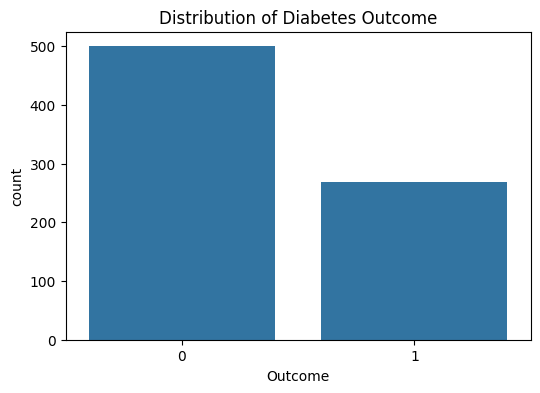

In [5]:
# Load the dataset
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\6th sem clg\SSP Project\Diabties Prediction\Data\diabetes.csv')  # Assumes the file is in the same directory

# Display first 5 rows
print("First 5 rows:")
display(df.head())

# Dataset information
print("\nDataset information:")
display(df.info())

# Statistical summary
print("\nStatistical summary:")
display(df.describe())

# Check for missing values
print("\nMissing values:")
display(df.isnull().sum())

# %% [markdown]
# ## 3. Exploratory Data Analysis (EDA)

# %%
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

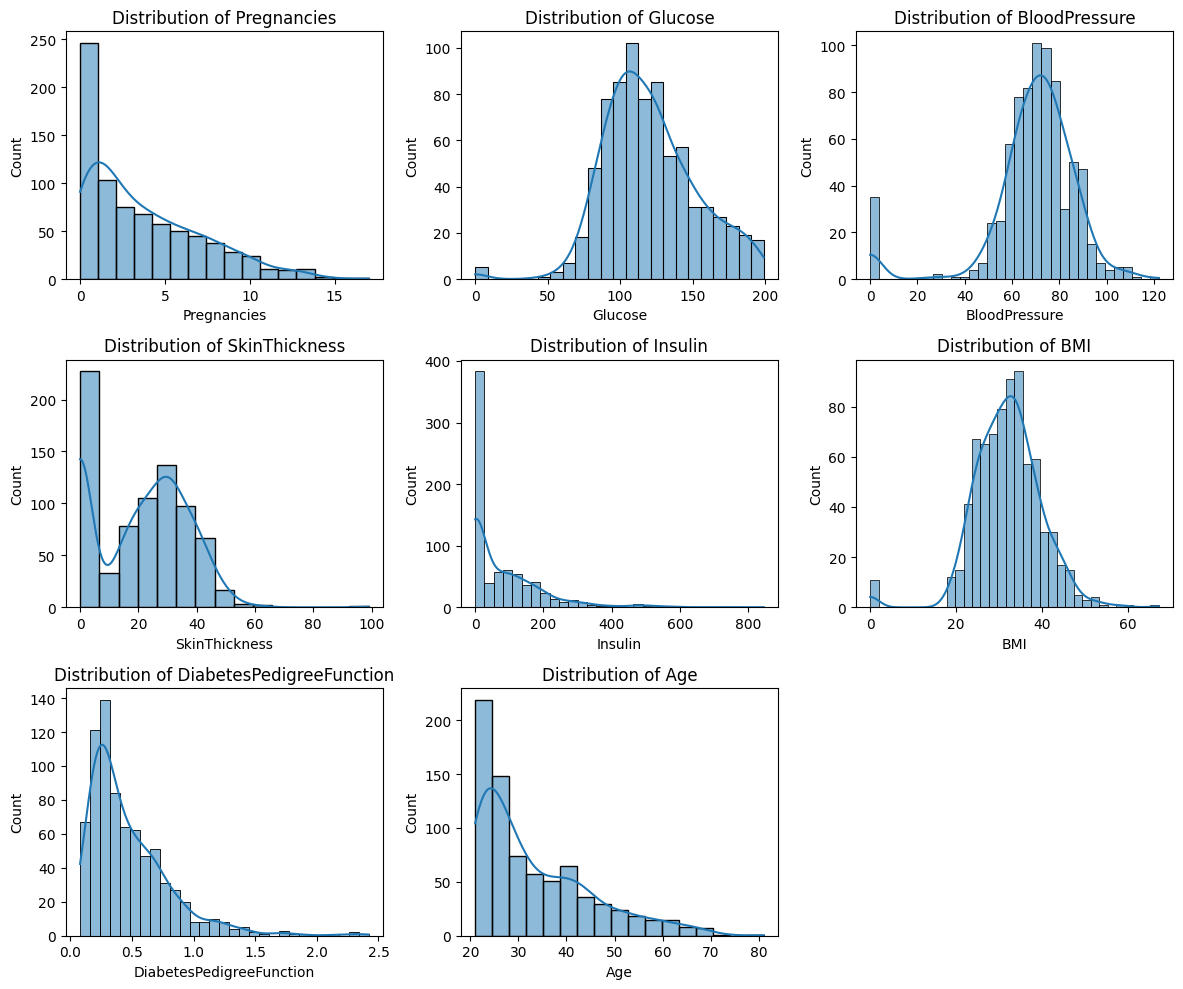

In [6]:
# Plot distributions of all features
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

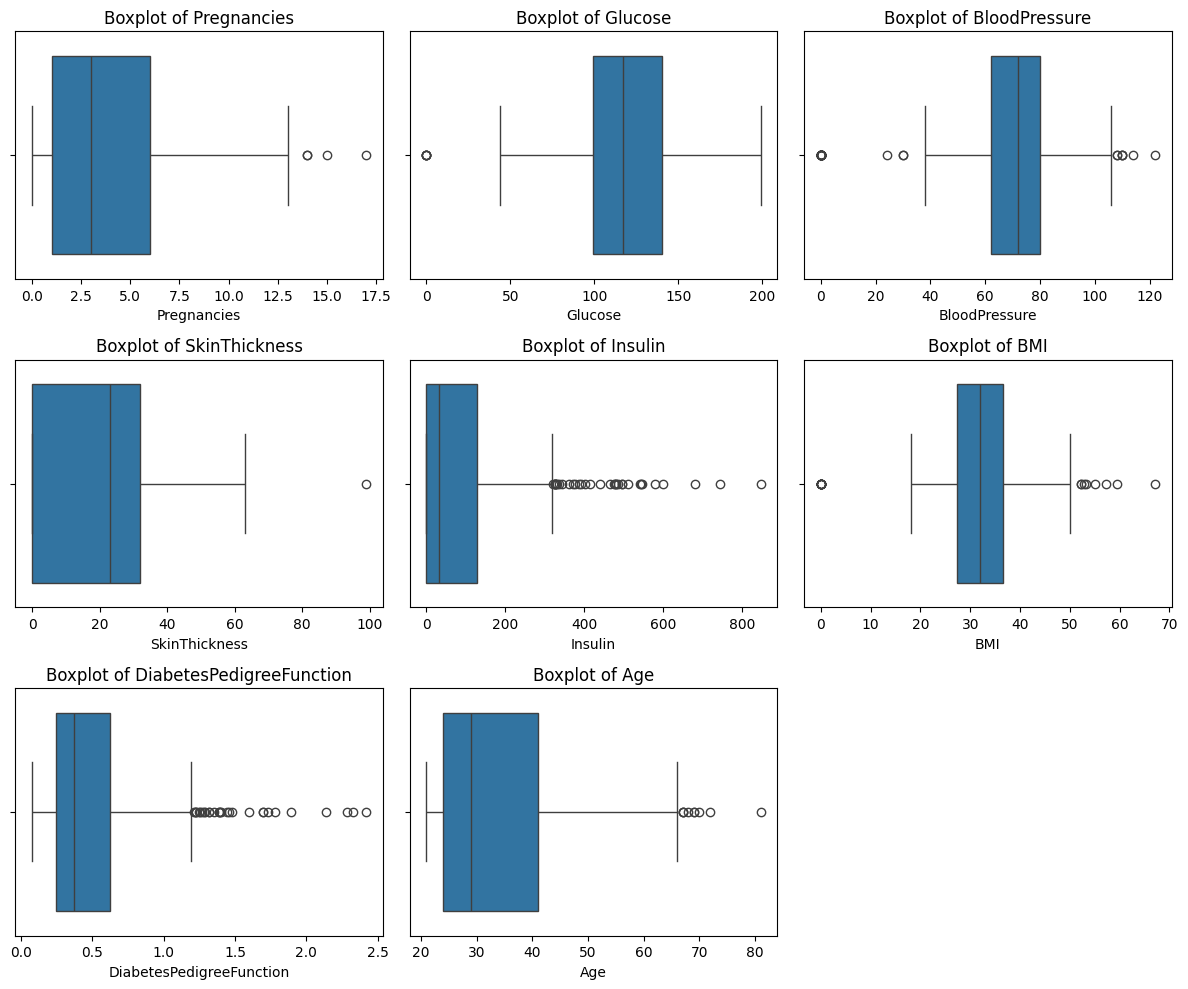

In [7]:
# Plot boxplots to identify outliers
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

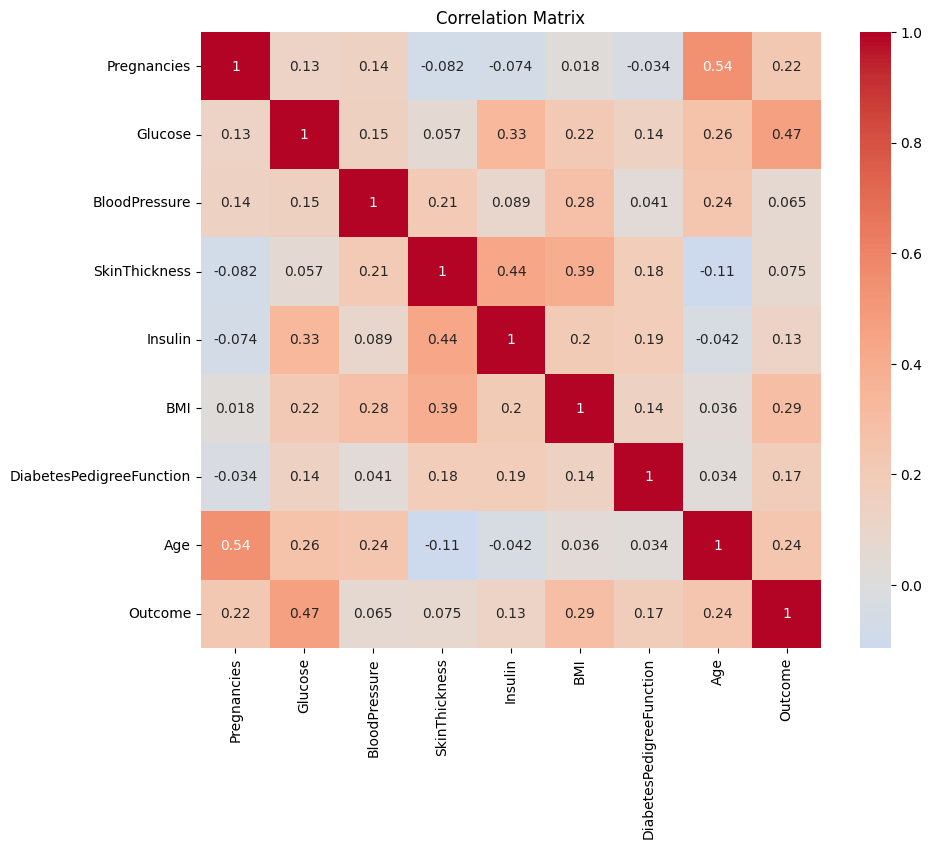

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Handle zeros in appropriate columns (they likely represent missing data)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_cols:
    df[col] = df[col].replace(0, np.nan)
    mean = df[col].mean()
    df[col] = df[col].replace(np.nan, mean)

In [10]:
# Split data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


In [12]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

In [15]:
# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_res, y_train_res)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }
       # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       100
           1       0.58      0.63      0.60        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       100
           1       0.63      0.74      0.68        54

    accuracy                           0.76       154
   m

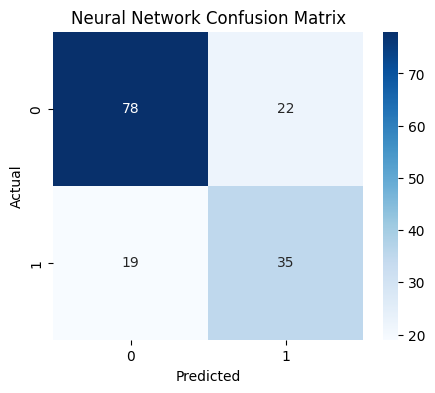

In [16]:
   
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [17]:
# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df)


Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.707792,0.573770,0.648148,0.608696,0.808889
Random Forest,0.707792,0.576271,0.629630,0.601770,0.809815
Gradient Boosting,0.759740,0.634921,0.740741,0.683761,0.830926
SVM,0.753247,0.629032,0.722222,0.672414,0.813148
Neural Network,0.733766,0.614035,0.648148,0.630631,0.789444


<Figure size 1200x600 with 0 Axes>

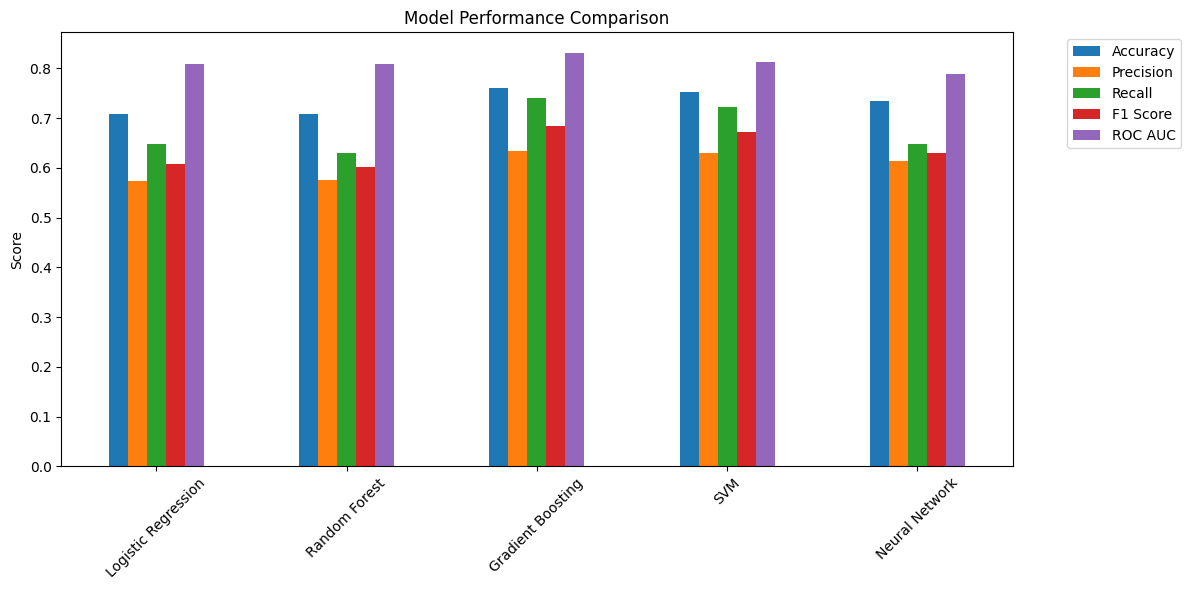

In [18]:
# Plot performance metrics
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [20]:
# Initialize GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, n_jobs=-1, scoring='roc_auc')

In [21]:

# Perform grid search
grid_search.fit(X_train_res, y_train_res)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\nOptimized Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC Score: 0.9028593749999999

Optimized Random Forest Performance:
Accuracy: 0.7402597402597403
ROC AUC: 0.8057407407407406

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



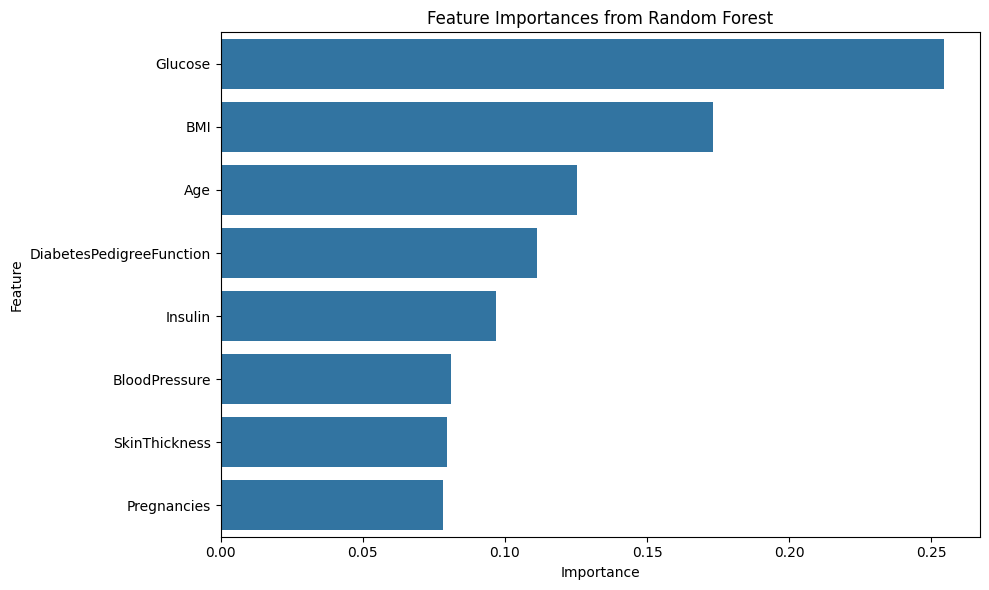

In [22]:
# Get feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

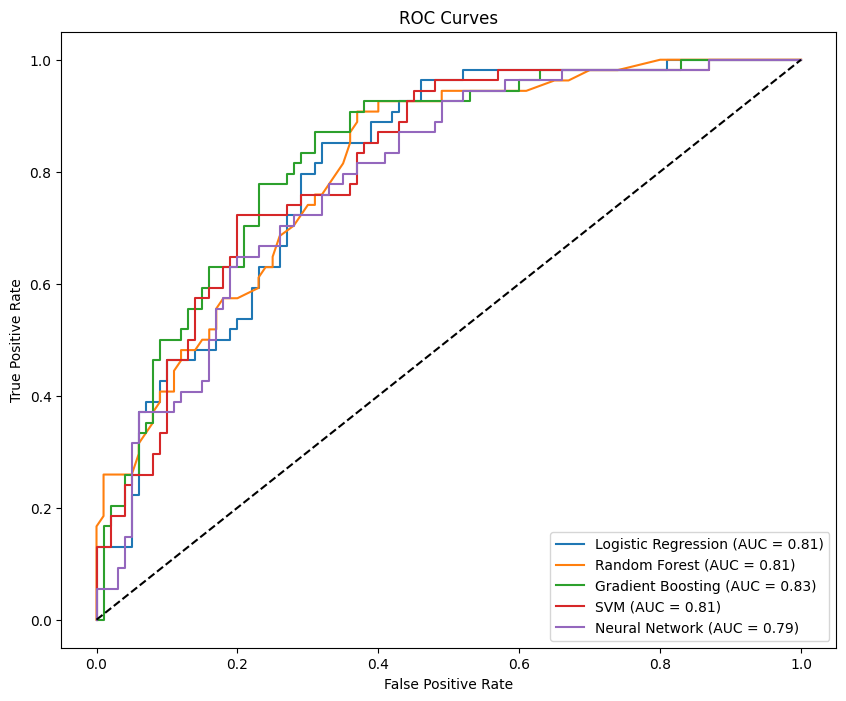

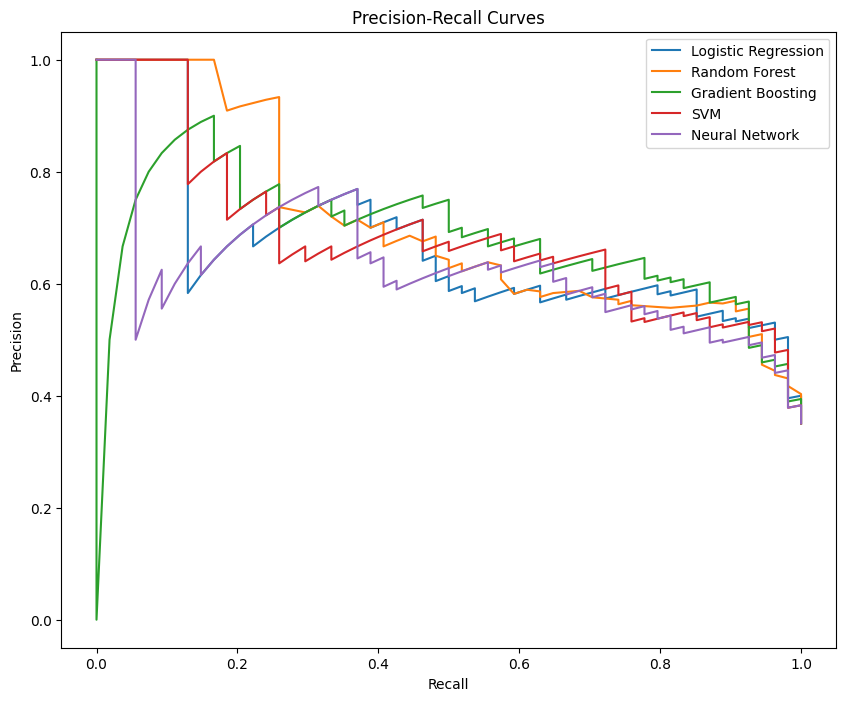

In [23]:

# %%
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# %%
# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()


In [24]:
# Based on our evaluation, select the best model
best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train_res, y_train_res)

# Evaluate final model
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

print("Final Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Final Model Performance:
Accuracy: 0.7597402597402597
ROC AUC: 0.830925925925926

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       100
           1       0.63      0.74      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



In [25]:
print("""
Project Conclusion:
- The Gradient Boosting model performed best with an accuracy of {:.2f}% and ROC AUC of {:.2f}.
- Key predictive features were Glucose level, BMI, and Age.
- The model can effectively identify patients at risk of diabetes for early intervention.
- Future improvements could include collecting more data and exploring deep learning approaches.
""".format(accuracy_score(y_test, y_pred)*100, roc_auc_score(y_test, y_prob)))


Project Conclusion:
- The Gradient Boosting model performed best with an accuracy of 75.97% and ROC AUC of 0.83.
- Key predictive features were Glucose level, BMI, and Age.
- The model can effectively identify patients at risk of diabetes for early intervention.
- Future improvements could include collecting more data and exploring deep learning approaches.



In [26]:
# Save the model (uncomment to use)
import joblib
joblib.dump(best_model, 'diabetes_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']